In [ ]:
pip install sinling

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_tagged.csv to sentiment_tagged.csv


In [ ]:
dataframe = pd.read_csv('SubjectivityTagged.csv', error_bad_lines=False)
#dataframe.dropna(inplace = True)
#dataframe

def clean_data(dataframe):
      dataframe['Text'] = dataframe['docid;comment;label']
      #dataframe['Text'] = dataframe.Text.apply(lambda x: pd.Series(str(x).split(";")))
      
      dataframe[['docid','Text','label']] = dataframe.Text.apply(lambda x: pd.Series(str(x).split(";")))
      return dataframe.head()

clean_data(dataframe)
#print(df['Text'].head(12));
#dataframe.to_csv('Subjectivity_tagged.csv')
dataframe

dataframe.drop(['docid;comment;label'], axis = 1)
#dataframe.to_csv('SubjectivityDataset (1).csv')

In [ ]:
dataframe = pd.read_csv('SubjectivityTagged.csv', error_bad_lines=False)
dataframe

,Unnamed: 0,Id,Text,Post_category,Text_cleaned
0,0,0.0,"""ලොරි,ටැක්ටර් පමන යොදාගනිමින් සෝමාවතී රක්ෂිතය...",News,ලොරිටැක්ටර් පමන යොදාගනිමින් සෝමාවතී රක්ෂිතයත්...
1,1,1.0,"""ගිනි ගන්නා ඉන්ධන නෞකාවේ කාර්ය මණ්ඩලය මුදා ගැන...",News,ගිනි ගන්නා ඉන්ධන නෞකාවේ කාර්ය මන්ඩලය මුදා ගැනී...
2,2,2.0,"""තිලක් මාරපනගේ සොහොයුරා ආණ්ඩුක්‍රම ව්‍යවස්ථාව ...",News,තිලක් මාරපනගේ සොහොයුරා අන්ඩුක්‍රම ව්‍යවස්ථාව හ...
3,3,3.0,ඉන්දීය අගමැතිගේ ට්විටර් ගිණුමට සයිබර් ප්‍රහාරය...,News,ඉන්දීය අගමැතිගේ ට්විටර් ගිනුමට සයිබර් ප්‍රහාරය...
4,4,4.0,"""පුවතක්. මොරවැව කැළේ ගල්සියබලා කැඩූ කට නඩු. අ...",News,පුවතක් මොරවැව කැලේ ගල්සියබලා කැඩූ කට නඩු අවුර...
...,...,...,...,...,...
612,612,NaN,ලෝක අටවන පුදුමය මනරම් සීගිරිය දැවැන්ත පර්වතය ක...,Emotion,ලෝක අටවන පුදුමය මනරම් සීගිරිය දැවැන්ත පර්වතය ක...
613,613,NaN,ලෝක නවවන පුදුමය හිමාෂ නැවතත් පොඩිවෙයි …,Emotion,ලෝක නවවන පුදුමය හිමාෂ නැවතත් පොඩිවෙයි …
614,614,NaN,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...,Emotion,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...
615,615,NaN,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...,Emotion,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...


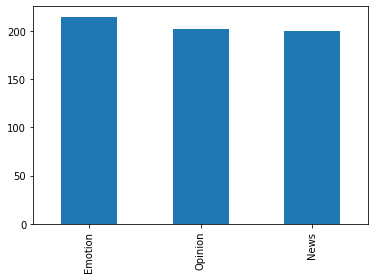

In [ ]:
%matplotlib inline
dataframe['Post_category'].value_counts().plot(kind="bar")

def plot_history(history):
    plt.title('Data-Set')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [ ]:
print("number of tweets belonging to positive and negative opinion")
dataframe.groupby('Post_category')['Text'].nunique()

number of tweets belonging to positive and negative opinion


Post_category
Emotion    205
News       200
Opinion    202
Name: Text, dtype: int64

In [ ]:
class_to_num = {"Post_category": {'Emotion': 2,
                'Opinion': 1,
                'News': 0
                }}
dataframe = dataframe.replace(class_to_num)
dataframe

,Unnamed: 0,Id,Text,Post_category,Text_cleaned
0,0,0.0,"""ලොරි,ටැක්ටර් පමන යොදාගනිමින් සෝමාවතී රක්ෂිතය...",0,ලොරිටැක්ටර් පමන යොදාගනිමින් සෝමාවතී රක්ෂිතයත්...
1,1,1.0,"""ගිනි ගන්නා ඉන්ධන නෞකාවේ කාර්ය මණ්ඩලය මුදා ගැන...",0,ගිනි ගන්නා ඉන්ධන නෞකාවේ කාර්ය මන්ඩලය මුදා ගැනී...
2,2,2.0,"""තිලක් මාරපනගේ සොහොයුරා ආණ්ඩුක්‍රම ව්‍යවස්ථාව ...",0,තිලක් මාරපනගේ සොහොයුරා අන්ඩුක්‍රම ව්‍යවස්ථාව හ...
3,3,3.0,ඉන්දීය අගමැතිගේ ට්විටර් ගිණුමට සයිබර් ප්‍රහාරය...,0,ඉන්දීය අගමැතිගේ ට්විටර් ගිනුමට සයිබර් ප්‍රහාරය...
4,4,4.0,"""පුවතක්. මොරවැව කැළේ ගල්සියබලා කැඩූ කට නඩු. අ...",0,පුවතක් මොරවැව කැලේ ගල්සියබලා කැඩූ කට නඩු අවුර...
...,...,...,...,...,...
612,612,NaN,ලෝක අටවන පුදුමය මනරම් සීගිරිය දැවැන්ත පර්වතය ක...,2,ලෝක අටවන පුදුමය මනරම් සීගිරිය දැවැන්ත පර්වතය ක...
613,613,NaN,ලෝක නවවන පුදුමය හිමාෂ නැවතත් පොඩිවෙයි …,2,ලෝක නවවන පුදුමය හිමාෂ නැවතත් පොඩිවෙයි …
614,614,NaN,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...,2,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...
615,615,NaN,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...,2,විවාහ දෙක කරගත් මියගිය ඉන්දිකගේ ජීවිත ජූලි මාස...


In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataframe['Text_cleaned'], dataframe['Post_category'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

Count Vectors as features

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(dataframe['Text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

TF-TDF as features

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(dataframe['Text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(dataframe['Text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(dataframe['Text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


Text / NLP based features

In [ ]:
# tokenization
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
from collections import Counter
from itertools import chain
from nltk import word_tokenize, pos_tag, pos_tag_sents
df = pandas.read_csv('SubjectivityTagged (1).csv')
df['Text'] = df['Text'].apply(word_tokenize).tolist()

# POS tagging
tagger = POSTagger()
df['Text'] = tagger.predict(df['Text'].tolist())
df['Text'] = pd.Series(df['Text'].tolist())

tokens, tags = zip(*chain(*df['Text'].tolist()))
possible_tags = sorted(set(tags))
possible_tags_counter = Counter({p:0 for p in possible_tags})

df['Text'].apply(lambda x: Counter(list(zip(*x))[1]))
df['pos_counts'] = df['Text'].apply(lambda x: Counter(list(zip(*x))[1]))
df['pos_counts']

def add_pos_with_zero_counts(counter, keys_to_add):
        for k in keys_to_add:
            counter[k] = counter.get(k, 0)
        return counter

df['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))
df['pos_counts_with_zero'] = df['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))

df['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])

df['sent_vector'] = df['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])



In [ ]:
df

,Unnamed: 0,Id,Text,Post_category,Text_cleaned,pos_counts,pos_counts_with_zero,sent_vector
0,0,0.0,"[(ලොරිටැක්ටර්, NNP), (පමන, VP), (යොදාගනිමින්, VNN), (සෝමාවතී, JJ), (රක්ෂිතයත්, NNC), (ඩෝසර්, JCV), (කරමින්, VNF), (පවතී, VNF)]",News,ලොරිටැක්ටර් පමන යොදාගනිමින් සෝමාවතී රක්ෂිතයත් ඩෝසර් කරමින් පවතී,"{'NNP': 1, 'VP': 1, 'VNN': 1, 'JJ': 1, 'NNC': 1, 'JCV': 1, 'VNF': 2, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0}","{'NNP': 1, 'VP': 1, 'VNN': 1, 'JJ': 1, 'NNC': 1, 'JCV': 1, 'VNF': 2, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0}","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1]"
1,1,1.0,"[(ගිනි, NNC), (ගන්නා, VP), (ඉන්ධන, JJ), (නෞකාවේ, NNC), (කාර්ය, NNJ), (මන්ඩලය, NNC), (මුදා, VNF), (ගැනීමට, VNN), (නාවික, JJ), (සහ, CC), (ගුවන්, JJ), (හමුදා, NNJ), (මෙහෙයුමක්ගිනි, NNC), (ගන්නා, VP), (ඉන්ධන, JJ), (නෞකාවේ, NNC), (කාර්ය, NNJ), (මන්ඩලය, NNC), (මුදා, VNF), (ගැනීමට, VNN), (නාවික, JJ), (සහ, CC), (ගුවන්, JJ), (හමුදා, NNJ), (මෙහෙයුමක්, NNC)]",News,ගිනි ගන්නා ඉන්ධන නෞකාවේ කාර්ය මන්ඩලය මුදා ගැනීමට නාවික සහ ගුවන් හමුදා මෙහෙයුමක්ගිනි ගන්නා ඉන්ධන නෞකාවේ කාර්ය මන්ඩලය මුදා ගැනීමට නාවික සහ ගුවන් හමුදා මෙහෙයුමක්,"{'NNC': 7, 'VP': 2, 'JJ': 6, 'NNJ': 4, 'VNF': 2, 'VNN': 2, 'CC': 2, 'ABB': 0, 'AUX': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNP': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0}","{'NNC': 7, 'VP': 2, 'JJ': 6, 'NNJ': 4, 'VNF': 2, 'VNN': 2, 'CC': 2, 'ABB': 0, 'AUX': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNP': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0}","[0, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]"
2,2,2.0,"[(තිලක්, NNP), (මාරපනගේ, NNP), (සොහොයුරා, NNC), (අන්ඩුක්‍රම, NNC), (ව්‍යවස්ථාව, NNC), (හදන, VP), (කමිටුවේතිලක්, NNP), (මාරපනගේ, NNP), (සොහොයුරා, NNC), (අන්ඩුක්‍රම, NNC), (ව්‍යවස්ථාව, NNC), (හදන, VP), (කමිටුවේ, NNC)]",News,තිලක් මාරපනගේ සොහොයුරා අන්ඩුක්‍රම ව්‍යවස්ථාව හදන කමිටුවේතිලක් මාරපනගේ සොහොයුරා අන්ඩුක්‍රම ව්‍යවස්ථාව හදන කමිටුවේ,"{'NNP': 4, 'NNC': 7, 'VP': 2, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'JJ': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0}","{'NNP': 4, 'NNC': 7, 'VP': 2, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'JJ': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0}","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]"
3,3,3.0,"[(ඉන්දීය, NNP), (අගමැතිගේ, NNC), (ට්විටර්, NNP), (ගිනුමට, NNP), (සයිබර්, NNP), (ප්‍රහාරයක්ඉන්දීය, NNP), (අගමැතිගේ, NNP), (ට්විටර්, NNP), (ගිනුමට, NNP), (සයිබර්, NNP), (ප්‍රහාරයක්, NNC)]",News,ඉන්දීය අගමැතිගේ ට්විටර් ගිනුමට සයිබර් ප්‍රහාරයක්ඉන්දීය අගමැතිගේ ට්විටර් ගිනුමට සයිබර් ප්‍රහාරයක්,"{'NNP': 9, 'NNC': 2, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'JJ': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 0, 'UNK': 0, 'VFM': 0, 'VNF': 0, 'VNN': 0, 'VP': 0}","{'NNP': 9, 'NNC': 2, 'ABB': 0, 'AUX': 0, 'CC': 0, 'CM': 0, 'DET': 0, 'FS': 0, 'JCV': 0, 'JJ': 0, 'NCV': 0, 'NDT': 0, 'NIP': 0, 'NNJ': 0, 'NUM': 0, 'NVB': 0, 'POST': 0, 'PRP': 0, 'PUNC': 0, 'QBE': 0, 'QUE': 0, 'RB': 0, 'RP': 0, 'RRPCV': 

In [ ]:
pd.set_option('display.max_colwidth', None)
df['sent_vector']

0      [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
1      [0, 0, 2, 0, 0, 1, 0, 8, 0, 0, 0, 8, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2]
2      [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 8, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
3      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
4      [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 4, 0, 6, 1, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
                                                ...                                           
612    [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
613    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
614    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]
615    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]
616    [1, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 4, 0, 1, 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import array

# pos_counts
data=[]
for i in df["sent_vector"].values:
    temp=[]
    for j in i:
        temp.append(j)
    data.append(temp)
data=np.array(data)

y=df['Post_category'].values

In [ ]:
#RF
model = ensemble.RandomForestClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('RF, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

RF, pos_counts Accuracy:  0.7411003236245954


In [ ]:
# svm
model = svm.SVC()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('svm, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

svm, pos_counts Accuracy:  0.7313915857605178


In [ ]:
# LR
model = linear_model.LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('LR, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

LR, pos_counts Accuracy:  0.6990291262135923


In [ ]:
# SGD
model = linear_model.SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('SGD, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

SGD, pos_counts Accuracy:  0.5825242718446602


In [ ]:
# NB
model = naive_bayes.MultinomialNB()
X_train, X_test, Y_train, Y_test = train_test_split(data,y,test_size=0.5, random_state=42)
#train_x, valid_x, train_y, valid_y = model.train_test_split(trainDF['Filtered_sentence'], trainDF['Class'])

model.fit(X_train, Y_train)

predictions = model.predict(X_test)
print('NB, pos_counts Accuracy: ', accuracy_score(Y_test.astype(str), predictions.astype(str)))

NB, pos_counts Accuracy:  0.6245954692556634


In [ ]:
from sklearn.preprocessing import label_binarize

Y = label_binarize(df["Post_category"].values, classes=[0, 1, 2])
n_classes = Y.shape[1]
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

Model build

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

# RF on Ngram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, gram Level TF-IDF: ", accuracy)

# RF on Character Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("RF, Character Level TF IDF: ", accuracy)

RF, Count Vectors:  0.8064516129032258
RF, WordLevel TF-IDF:  0.8193548387096774
RF, gram Level TF-IDF:  0.8516129032258064
RF, Character Level TF IDF:  0.8838709677419355


In [ ]:
# SGD on Count Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_count, train_y, xvalid_count)
print ("SGD, Count Vectors: ", accuracy)

# SGD on Word Level TF IDF Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SGD, WordLevel TF-IDF: ", accuracy)

# SGD on Ngram Level TF IDF Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SGD, gram Level TF-IDF: ", accuracy)

# SGD on Character Level TF IDF Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SGD, Character Level TF IDF: ", accuracy)

SGD, Count Vectors:  0.8129032258064516
SGD, WordLevel TF-IDF:  0.9032258064516129
SGD, gram Level TF-IDF:  0.9290322580645162
SGD, Character Level TF IDF:  0.9870967741935484


In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.7612903225806451
NB, WordLevel TF-IDF:  0.7032258064516129
NB, N-Gram Vectors:  0.8903225806451613
NB, CharLevel Vectors:  0.8580645161290322


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR, Count Vectors:  0.8193548387096774
LR, WordLevel TF-IDF:  0.7870967741935484
LR, N-Gram Vectors:  0.9225806451612903
LR, CharLevel Vectors:  0.9483870967741935


In [ ]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracy)

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, Ngram Level TF IDF Vectors: ", accuracy)

# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, Word Level TF IDF Vectors: ", accuracy)

# SVM on Character Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SVM, Character Level TF IDF Vectors: ", accuracy)

SVM, Count Vectors:  0.6645161290322581
SVM, Ngram Level TF IDF Vectors:  0.9419354838709677
SVM, Word Level TF IDF Vectors:  0.7741935483870968
SVM, Character Level TF IDF Vectors:  0.9548387096774194


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [ ]:
sgd.predict(valid_x)

array([1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2,
       0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0])

In [ ]:
from pickle import load, dump
dump(sgd, open("model.pkl", "wb"))
model = load(open("model.pkl", "rb"))

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(valid_x)
tags = ['Opinion','Emotion','News']
print('Accuracy %s' % accuracy_score(y_pred, valid_y))

print(classification_report(valid_y, y_pred,target_names=tags))

Accuracy 0.8193548387096774
              precision    recall  f1-score   support

     Opinion       0.75      0.89      0.81        44
     Emotion       0.83      0.76      0.80        51
        News       0.88      0.82      0.84        60

    accuracy                           0.82       155
   macro avg       0.82      0.82      0.82       155
weighted avg       0.82      0.82      0.82       155



In [ ]:
text = "නියම සිංහල මහත්මයෙක්"

pred = model.predict([text])
print(tags[pred[0]-1])

Opinion


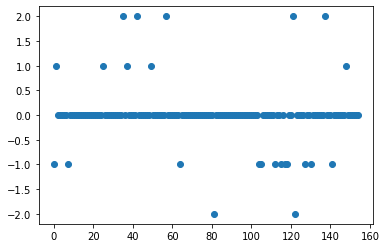

In [ ]:
g=plt.plot(valid_y - y_pred,marker='o',linestyle='')

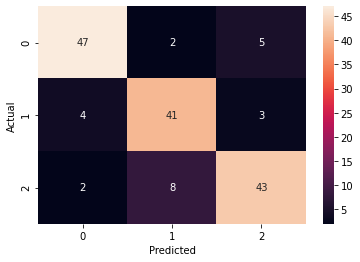

In [ ]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_pred, valid_y), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Sentiment Analysis on opinion sentences

In [ ]:
# importing pandas as pd
import pandas as pd
  
# Read the csv file and construct the 
# dataframe
df = pd.read_csv('SubjectivityTagged.csv')
  
# First filter out those rows which
# does not contain any data
df = df.dropna(how = 'all')
  
# Filter all rows for which the player's
# age is greater than or equal to 25
df.drop(df[df['Post_category'] == 'News'].index, inplace = True)
df.drop(df[df['Post_category'] == 'Emotion'].index, inplace = True)
  
# Print the modified dataframe
print(df.head(15))
  
# Print the shape of the dataframe
print(df.shape)
df.to_csv('SubjectivityTagged.csv')

     Unnamed: 0  ...                                       Text_cleaned
200         200  ...                               නියම සිංහල මහත්මයෙක්
201         201  ...                                      අන්න මිනිස්සු
202         202  ...                                        අයියෝ සල්ලි
203         203  ...  අනේ මටත් හිතෙනවා එ හරියෙන් ම ගෙයක් හදාගන්න දෙන...
204         204  ...  එක හොද ක්‍රියාවක් වුනත් සොරකමට අනුබල දීමක් නිස...
205         205  ...  දීය යුතු දඩුවම ලබු ගෙඩියේ අයිතිකරු විසින් ලබා ...
206         206  ...                         මටත් අසයි ලබු කිරිබත් කන්න
207         207  ...  ලබු කිරිබත් වලට වඩා රසයි ලබු කොලෙන් හදන එක්තරා...
208         208  ...  ලබු ඔනෑවට වඩා කෑමෙන් ෂරීරයේ ඇට මෙලෙක් වෙනවා බො...
209         209  ...  එ මනුෂ්‍යයා හොද කෙනෙක් හරිදේ එකයි පින්වැඩි කමට...
210         210  ...                                  හිතහොද මනුස්සයෙක්
211         211  ...                                 හොරු බෝ කරන කෙනෙක්
212         212  ...  නිමල් වගේ අය තමයි පොල් ගෙඩියටත් උසාවි යන්න

In [ ]:
print("number of tweets belonging to Post_category opinion")
df.groupby('Post_category')['Text'].nunique()

number of tweets belonging to Post_category opinion


Post_category
Opinion    202
Name: Text, dtype: int64

In [ ]:
dataframe2 = pd.read_csv('SubjectivityTagged.csv', error_bad_lines=False)
dataframe2

,Unnamed: 0,Unnamed: 0.1,Id,Text,Post_category,Text_cleaned
0,200,200,200.0,නියම සිංහල මහත්මයෙක්.,Opinion,නියම සිංහල මහත්මයෙක්
1,201,201,201.0,අන්න මිනිස්සු...,Opinion,අන්න මිනිස්සු
2,202,202,202.0,අයියෝ සල්ලි,Opinion,අයියෝ සල්ලි
3,203,203,203.0,අනේ මටත් හිතෙනවා ඒ හරියෙන් ම ගෙයක් හදාගන්න.. ද...,Opinion,අනේ මටත් හිතෙනවා එ හරියෙන් ම ගෙයක් හදාගන්න දෙන...
4,204,204,204.0,ඒක හොද ක්‍රියාවක් වුණත් සොරකමට අනුබල දීමක් නිස...,Opinion,එක හොද ක්‍රියාවක් වුනත් සොරකමට අනුබල දීමක් නිස...
...,...,...,...,...,...,...
197,397,397,397.0,හරිම ආඩම්බරයි. ජර්මනියේ සාමාන්‍ය ගෙවල් වල ඉන්න...,Opinion,හරිම අඩම්බරයි ජර්මනියේ සාමාන්‍ය ගෙවල් වල ඉන්න ...
198,398,398,398.0,ගොඩක් ලස්සනයි.හොදට පුහුණු කරවලා.පුහුණු කරවපු ක...,Opinion,ගොඩක් ලස්සනයිහොදට පුහුනු කරවලාපුහුනු කරවපු කට්...
199,399,399,399.0,හොදයි,Opinion,හොදයි
200,400,400,400.0,හරිම සුන්දරයි,Opinion,හරිම සුන්දරයි


In [ ]:
dataframe = pd.read_csv('sentiment_tagged.csv', error_bad_lines=False)
dataframe

,Unnamed: 0,Text,label
0,0,නියම සිංහල මහත්මයෙක්.,POSITIVE
1,1,අන්න මිනිස්සු...,POSITIVE
2,2,අයියෝ සල්ලි,NEGATIVE
3,3,අනේ මටත් හිතෙනවා ඒ හරියෙන් ම ගෙයක් හදාගන්න.. ද...,POSITIVE
4,4,ඒක හොද ක්‍රියාවක් වුණත් සොරකමට අනුබල දීමක් නිස...,NEGATIVE
...,...,...,...
4117,4117,මිනිස්සු කැමති මිනිසුන්ට වැඩකරන දේශපාලකයන්ට න...,NEGATIVE
4118,4118,මේවා දේශපාලන පළිගැනීම් නොවේද?,NEGATIVE
4119,4119,දූෂණ වංචා සම්බන්ධයෙන් චෝදනා ලැබූ පසුගිය ආණ්‌ඩු...,NEGATIVE
4120,4120,වැරදිකාරයන්ට දඬුවම් කරන්න ඕනෑ,NEGATIVE


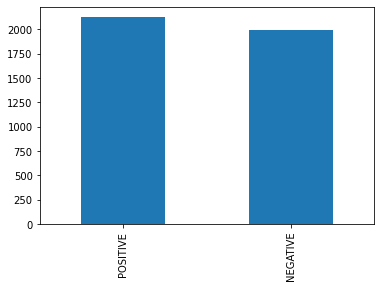

In [ ]:
%matplotlib inline
dataframe['label'].value_counts().plot(kind="bar")

def plot_history(history):
    plt.title('Data-Set')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

In [ ]:
print("number of tweets belonging to positive and negative opinion")
dataframe.groupby('label')['Text'].nunique()

number of tweets belonging to positive and negative opinion


label
NEGATIVE    1985
POSITIVE    2060
Name: Text, dtype: int64

In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataframe['Text'], dataframe['label'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(dataframe['Text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(dataframe['Text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(dataframe['Text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(dataframe['Text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)



In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR, Count Vectors:  0.7798254122211445
LR, WordLevel TF-IDF:  0.7904946653734238
LR, N-Gram Vectors:  0.8360814742967992
LR, CharLevel Vectors:  0.8428709990300679


In [ ]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

# RF on Ngram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, gram Level TF-IDF: ", accuracy)

# RF on Character Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("RF, Character Level TF IDF: ", accuracy)

RF, Count Vectors:  0.7837051406401552
RF, WordLevel TF-IDF:  0.7730358874878759
RF, gram Level TF-IDF:  0.8021338506304558
RF, Character Level TF IDF:  0.8370514064015518


In [ ]:
from sklearn.linear_model import SGDClassifier
# SGD on Count Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_count, train_y, xvalid_count)
print ("SGD, Count Vectors: ", accuracy)

# SGD on Word Level TF IDF Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SGD, WordLevel TF-IDF: ", accuracy)

# SGD on Ngram Level TF IDF Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SGD, gram Level TF-IDF: ", accuracy)

# SGD on Character Level TF IDF Vectors
accuracy = train_model(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SGD, Character Level TF IDF: ", accuracy)

SGD, Count Vectors:  0.7371483996120272
SGD, WordLevel TF-IDF:  0.8021338506304558
SGD, gram Level TF-IDF:  0.8040737148399612
SGD, Character Level TF IDF:  0.8554801163918526


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', linear_model.LogisticRegression()),
               ])
sgd.fit(train_x, train_y)

sgd.predict(valid_x)

from pickle import load, dump
dump(sgd, open("model.pkl", "wb"))
model = load(open("model.pkl", "rb"))

from sklearn.metrics import classification_report
y_pred = model.predict(valid_x)
tags = ['POSITIVE','NEGATIVE']
print('Accuracy %s' % accuracy_score(y_pred, valid_y))

print(classification_report(valid_y, y_pred,target_names=tags))

Accuracy 0.7662463627546072
              precision    recall  f1-score   support

    POSITIVE       0.78      0.76      0.77       529
    NEGATIVE       0.75      0.77      0.76       502

    accuracy                           0.77      1031
   macro avg       0.77      0.77      0.77      1031
weighted avg       0.77      0.77      0.77      1031



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', linear_model.LogisticRegression()),
               ])
sgd.fit(train_x, train_y)

sgd.predict(valid_x)

from pickle import load, dump
dump(sgd, open("model.pkl", "wb"))
model2 = load(open("model.pkl", "rb"))

from sklearn.metrics import classification_report
y_pred = model2.predict(valid_x)
tags = ['POSITIVE','NEGATIVE']
print('Accuracy %s' % accuracy_score(y_pred, valid_y))

print(classification_report(valid_y, y_pred,target_names=tags))


Accuracy 0.7837051406401552
              precision    recall  f1-score   support

    POSITIVE       0.77      0.80      0.79       510
    NEGATIVE       0.80      0.77      0.78       521

    accuracy                           0.78      1031
   macro avg       0.78      0.78      0.78      1031
weighted avg       0.78      0.78      0.78      1031



In [ ]:
text = "නියම සිංහල මහත්මයෙක්	"

pred = model2.predict([text])
print(tags[pred[0]-1])

POSITIVE


Sentiment analysis Opinionated sentences

In [ ]:
data1=pd.read_csv('SubjectivityTagged.csv')
sentences = data1['Text_cleaned'].values.astype('U')
y_hats2 = model2.predict(sentences)

df['Predictions'] = y_hats2

In [ ]:
class_to_num = {"Predictions": {1: 'POSITIVE',
                0: 'NEGATIVE'
                }}
                
df = df.replace(class_to_num)
df


,Unnamed: 0,Id,Text,Post_category,Text_cleaned,Predictions
200,200,200.0,නියම සිංහල මහත්මයෙක්.,Opinion,නියම සිංහල මහත්මයෙක්,POSITIVE
201,201,201.0,අන්න මිනිස්සු...,Opinion,අන්න මිනිස්සු,NEGATIVE
202,202,202.0,අයියෝ සල්ලි,Opinion,අයියෝ සල්ලි,NEGATIVE
203,203,203.0,අනේ මටත් හිතෙනවා ඒ හරියෙන් ම ගෙයක් හදාගන්න.. ද...,Opinion,අනේ මටත් හිතෙනවා එ හරියෙන් ම ගෙයක් හදාගන්න දෙන...,POSITIVE
204,204,204.0,ඒක හොද ක්‍රියාවක් වුණත් සොරකමට අනුබල දීමක් නිස...,Opinion,එක හොද ක්‍රියාවක් වුනත් සොරකමට අනුබල දීමක් නිස...,NEGATIVE
...,...,...,...,...,...,...
397,397,397.0,හරිම ආඩම්බරයි. ජර්මනියේ සාමාන්‍ය ගෙවල් වල ඉන්න...,Opinion,හරිම අඩම්බරයි ජර්මනියේ සාමාන්‍ය ගෙවල් වල ඉන්න ...,NEGATIVE
398,398,398.0,ගොඩක් ලස්සනයි.හොදට පුහුණු කරවලා.පුහුණු කරවපු ක...,Opinion,ගොඩක් ලස්සනයිහොදට පුහුනු කරවලාපුහුනු කරවපු කට්...,POSITIVE
399,399,399.0,හොදයි,Opinion,හොදයි,POSITIVE
400,400,400.0,හරිම සුන්දරයි,Opinion,හරිම සුන්දරයි,POSITIVE


In [ ]:
data1=pd.read_csv('SubjectivityTagged.csv')

In [ ]:
sentences = data1['Text_cleaned'].values.astype('U')
y = df['Post_category']
X_train, X_test, y_train, y_test = train_test_split(sentences, y)

tags = ['0','1']

In [ ]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0])

In [ ]:
from pickle import load, dump
dump(model, open("model.pkl", "wb"))
model = load(open("model.pkl", "rb"))

In [ ]:
y_pred = model.predict(X_test)

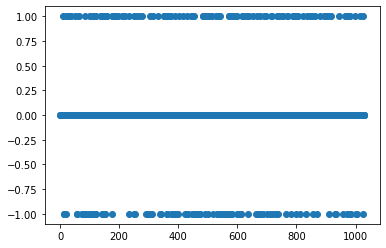

In [ ]:
g=plt.plot(valid_y - y_pred,marker='o',linestyle='')

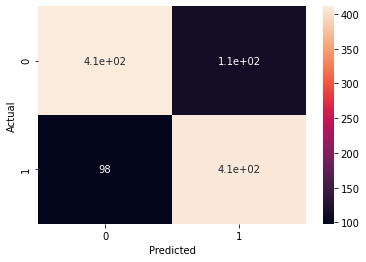

In [ ]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_pred, valid_y), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()